In [1]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [3]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


The discrepancy between performance of the training and test sets are due to overfitting.

#### Ridge regression

- Perform L2 regularization
- which is require the coefficient magnitude to be as small as possible, so that features will have the little effect on the outcome as possible.
- Above constraint is an example of <font color=orange><i>regularization</i></font>.
- Regularization : restrict a model to avoid overfitting

In [4]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- Training score drops but test score increases.
- Gap between the scores are reduced. Overfitting is prevented.

<font color=pink> Setting the restrictions:</font>
- Increasing <font color=orange><i>alpha<i/></font> forces coefficient to move more towards zero.
- Hence, reduces the training set performance & help generalization.

In [5]:
alpha=10
ridge10 = Ridge(alpha=alpha).fit(X_train, y_train)
print("Alpha: {}".format(alpha))
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Alpha: 10
Training set score: 0.79
Test set score: 0.64


In [6]:
alpha=0.1
ridge01 = Ridge(alpha=alpha).fit(X_train, y_train)
print("Alpha: {}".format(alpha))
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Alpha: 0.1
Training set score: 0.93
Test set score: 0.77


<IPython.core.display.Javascript object>


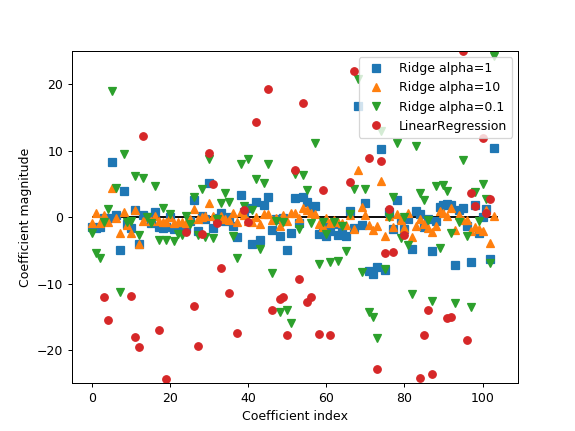

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


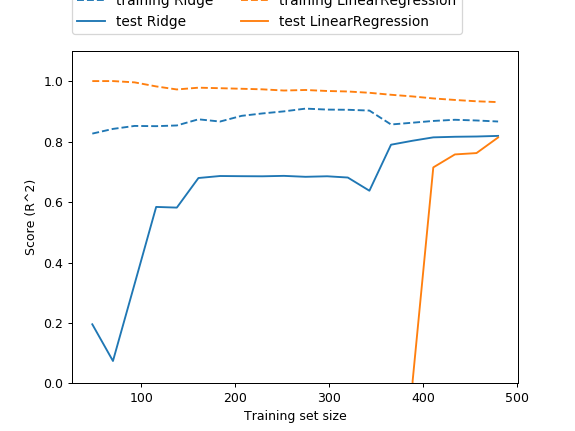

In [8]:
mglearn.plots.plot_ridge_n_samples()

- Ridge is regularized, so its training score is lower than that of LR
- LR unable to learn anything for training data of less than 400
- Both model improve as more data is added.
- Regularization factor become unimportant for an enough amount of training data.
- As more data is added, it becomes harder for a model to overfit, or <font color=orange> memorize the data</font>.

#### Lasso regression

- Perform L1 regularization
- which require the coefficients to be exactly zero.
- Model ignored some features, leaving only the important features to be non-zeros.

In [11]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


- Both performance are close to each other. The model is likely to be underfitting.
- Lasso did bad.
- Require the modification of alpha to improve the model.
- Reduce alpha to increase the training score.

In [12]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


If alpha is too low, the effect of regularization is removed and back to being overfitting, same as LR.

In [13]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


<IPython.core.display.Javascript object>


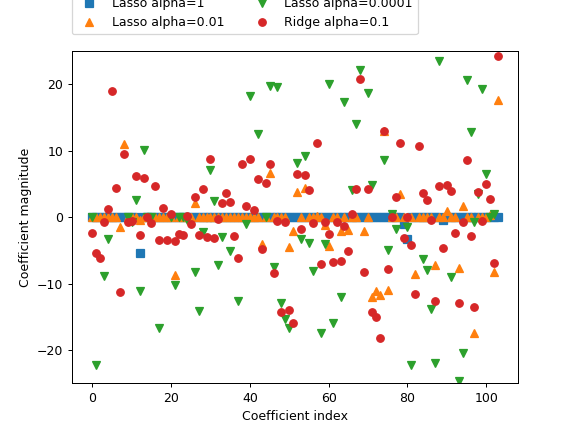

Text(0, 0.5, 'Coefficient magnitude')

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- Lasso 0.00001 model is quite unregularized.
- Lasso 1 model has most of the coefficients to be zero.
- Lasso 0.01 has a similar predictive performance as that of Ridge 0.1.
- But for Ridge 0.1, all the coefficients are non-zero.

- Ridge usually better than Lasso.
- However, if one has a large amunt of features and expect only a few of them to be important, Lasso might be a better choice.